In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [6]:
# Settings to make my plot and fonts bigger without having to do it every time
plt.rc('figure', figsize=(13, 6))
plt.rc('font', size=14)

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

 What is the probability that no cars drive up in the noon hour?
 
 What is the probability that 3 or more cars come through the drive through?
 
 How likely is it that the drive through gets at least 1 car?

Text(0, 0.5, '$P(X = x)$')

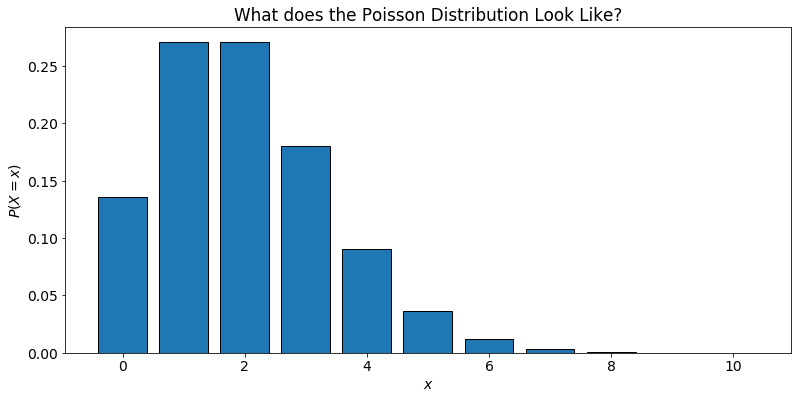

In [10]:
# Using Poisson Distribution & we can use pmf (probability mass function)
# pmf = a point(only for discrete distributions)
x = np.arange(0,11)
y = stats.poisson(2).pmf(x)
plt.bar(x,y, ec="black")
plt.title("What does the Poisson Distribution Look Like?")
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')

In [9]:
# What is the probability that no cars drive up in the noon hour?
# Avg goes in poisson(2). Using pmf to see probability of 0 cars.
# Theoretical Approach
stats.poisson(2).pmf(0)

0.1353352832366127

In [13]:
# Experimental approach using simulations
cars = np.random.poisson(2,10_000)
#Get a boolean series then you can get the average
(cars == 0).mean()

0.1307

In [14]:
# What is the probability that 3 or more cars come through the drive through?
# We want to know prob when 3 or more cars drive thru. Use sf (survival function) bc
# we are given a value and want to know the probability of 3 or more (greater than). 
# Use 2 in sf due to definition of takes on a value greater than a given point

stats.poisson(2).sf(2)

0.32332358381693654

In [15]:
# Experimental
cars = np.random.poisson(2,10_000)
(cars >= 3).mean()

0.3235

In [16]:
# How likely is it that the drive through gets at least 1 car?
# Use sf again, asking for 1 or more car drove thru. sf(0) used  bc definition
stats.poisson(2).sf(0)

0.8646647167633873

In [17]:
# Experimental
cars = np.random.poisson(2,10_000)
(cars > 0).mean()

0.8636

2 Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?

In [18]:
# What grade point average is required to be in the top 5% of the graduating class?
# Normal distribution due to given a mean and std.
μ = 3
σ = .3

grades = stats.norm(μ, σ)
# using ppf (percent point function). We are given top 5% and want a GPA (value)
top_5_percent = grades.ppf(.95)

top_5_percent

3.4934560880854417

In [20]:
# Experimental approach
μ = 3
σ = .3
trials = 10_000
grade = np.random.normal(μ, σ, trials)
pd.Series(grade).quantile(.95)

3.492086124129523

In [21]:
# What GPA constitutes the bottom 15% of the class? Use ppf (percent point function)
# Takes on a value less than or equal to a given value.
μ = 3
σ = .3

grades = stats.norm(μ, σ)
bottom_15_percent = grades.ppf(.15)

bottom_15_percent

2.689069983151863

In [22]:
# Experimental approach
μ = 3
σ = .3
trials = 10_000
grade = np.random.normal(μ, σ, trials)
pd.Series(grade).quantile(.15)

2.6846320408815383

In [32]:
# An eccentric alumnus left scholarship money for students in the third decile from the
# bottom of their class. Determine the range of the third decile. We want to find the 
# range of 20-30% (decile). Going to use ppf
μ = 3
σ = .3

grades = stats.norm(μ, σ)
upper_30 = grades.ppf(.30)

upper_30

2.842679846187588

In [30]:
lower_30 = grades.ppf(.20)

lower_30

2.7475136299281258

In [36]:
# Experimental approach
grade = np.random.normal(μ, σ, trials)
pd.Series(grade).quantile(.3)

2.8447913432597947

In [37]:
grade = np.random.normal(μ, σ, trials)
pd.Series(grade).quantile(.2)

2.7437553358527

In [33]:
# Would a student with a 2.8 grade point average qualify for this scholarship? YES!
print(f"A student with a gpa range of {round(lower_30,2)} and {round(upper_30,2)} would qualify for this scholarship.")

A student with a gpa range of 2.75 and 2.84 would qualify for this scholarship.


In [35]:
# If I have a GPA of 3.5, what percentile am I in? Going to use sf survival function
# we are given a value and want a probability. You would be in the top 5%
grades = stats.norm(μ, σ)
probability = grades.sf(3.5)

round(probability,2)

0.05

In [43]:
# Experimental approach
percentile = np.random.normal(μ, σ, trials)
pd.Series(percentile).quantile(.95)

3.4923453139007323

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?